In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 692 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
RISKY_ASSET = '005930.KS'
#START_DATE = '2008-01-01'
START_DATE = '2012-06-30'
END_DATE = '2022-06-30'

In [ ]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18786.896484,19106750
2012-07-03,23640.0,23860.0,23400.0,23500.0,18802.896484,15801550
2012-07-04,23640.0,23940.0,23560.0,23820.0,19058.933594,19158750
2012-07-05,23740.0,23880.0,23540.0,23700.0,18962.919922,9068550
2012-07-06,23880.0,23880.0,23060.0,23220.0,18578.863281,21158900
...,...,...,...,...,...,...
2022-06-23,57700.0,58000.0,56800.0,57400.0,56661.824219,28338608
2022-06-24,57900.0,59100.0,57700.0,58400.0,57648.964844,23256103
2022-06-27,59000.0,59900.0,58300.0,58800.0,58043.820312,18122236


Average return: 0.06%


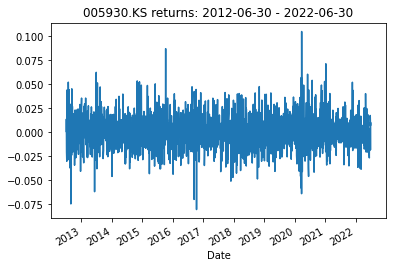

In [ ]:
#일수익률 계산
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna() # pct_change : 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력하는 메서드
print(f'Average return: {100 * returns.mean():.2f}%')

returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

In [ ]:
returns

Date
2012-07-03    0.000852
2012-07-04    0.013617
2012-07-05   -0.005038
2012-07-06   -0.020253
2012-07-09   -0.030146
                ...   
2022-06-23   -0.003472
2022-06-24    0.017422
2022-06-27    0.006849
2022-06-28    0.010204
2022-06-29   -0.017599
Name: Adj Close, Length: 2456, dtype: float64

과거 데이터를 통해 미래의 수익률을 정확히 알아내는것은 불가능합니다. 하지만 과거 기간동안의 움직임을 바탕으로 기대수익률을 추정할 수는 있습니다. 가장 간단한 추정 방법은 전체 기간동안 수익률의 평균을 계산하는 것입니다. 여기서 수익률을 계산할 때에는 로그 수익률을 사용합니다.

​

In [ ]:
#로그 수익률 구하기
import numpy as np
#shift(1)은 가격을 1일 뒤로 미루는 역할
df['log_close'] = np.log(df['Close']/df['Close'].shift(1))
df

,Open,High,Low,Close,Adj Close,Volume,log_close
Date,,,,,,,
2012-07-02,24160.0,24180.0,23420.0,23480.0,18786.896484,19106750,NaN
2012-07-03,23640.0,23860.0,23400.0,23500.0,18802.896484,15801550,0.000851
2012-07-04,23640.0,23940.0,23560.0,23820.0,19058.933594,19158750,0.013525
2012-07-05,23740.0,23880.0,23540.0,23700.0,18962.919922,9068550,-0.005051
2012-07-06,23880.0,23880.0,23060.0,23220.0,18578.863281,21158900,-0.020461
...,...,...,...,...,...,...,...
2022-06-23,57700.0,58000.0,56800.0,57400.0,56661.824219,28338608,-0.003478
2022-06-24,57900.0,59100.0,57700.0,58400.0,57648.964844,23256103,0.017272
2022-06-27,59000.0,59900.0,58300.0,58800.0,58043.820312,18122236,0.006826


In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,log_close
Date,,,,,,,
2012-07-03,23640.0,23860.0,23400.0,23500.0,18802.896484,15801550,0.000851
2012-07-04,23640.0,23940.0,23560.0,23820.0,19058.933594,19158750,0.013525
2012-07-05,23740.0,23880.0,23540.0,23700.0,18962.919922,9068550,-0.005051
2012-07-06,23880.0,23880.0,23060.0,23220.0,18578.863281,21158900,-0.020461
2012-07-09,22700.0,22760.0,22520.0,22520.0,18018.785156,21282300,-0.030610
...,...,...,...,...,...,...,...
2022-06-23,57700.0,58000.0,56800.0,57400.0,56661.824219,28338608,-0.003478
2022-06-24,57900.0,59100.0,57700.0,58400.0,57648.964844,23256103,0.017272
2022-06-27,59000.0,59900.0,58300.0,58800.0,58043.820312,18122236,0.006826


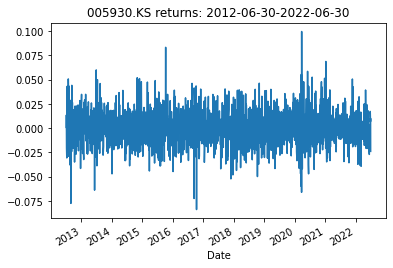

In [ ]:
log_df = df['log_close']
log_df = log_df.dropna()
log_df.plot(title=f'{RISKY_ASSET} returns: {START_DATE}-{END_DATE}')

In [ ]:
log_df

Date
2012-07-03    0.000851
2012-07-04    0.013525
2012-07-05   -0.005051
2012-07-06   -0.020461
2012-07-09   -0.030610
                ...   
2022-06-23   -0.003478
2022-06-24    0.017272
2022-06-27    0.006826
2022-06-28    0.010152
2022-06-29   -0.023851
Name: log_close, Length: 2456, dtype: float64

In [ ]:
#일별 기대수익률 계산
mu =df['log_close'].mean()
mu

0.00036819788908246044

In [ ]:
#연간 기대수익률 계산 (252일 사용)
mu= df['log_close'].mean()*252
mu

0.09278586804878003

In [ ]:
#훈련과 테스트 집합으로 분할
# train = log_df['2010-07-01':'2022-04-30']
# test = log_df['2022-04-30':'2022-06-29']
# #test.index
# test
train = log_df['2012-07-01':'2020-06-30']
test = log_df['2020-07-01':'2022-06-30']

삼성전자는 1년에 평균적으로 0.1175(11.7%)의 로그수익률이 나올 것이다.

High risk, high return 이라는 유명한 말이 있습니다. return과 위험을 나타내는 risk들 간의 관계가 한 쪽을 추구하면 다른 한 쪽을 떠안아야 (또는 희생해야)하는 상호 교환적 관계가 있음을 의미합니다. 그렇다면 여기서 risk는 어떤 값을 나타내는것 일까요? Risk에 대한 정의는 여러종류의 정의가 존재합니다. 돈을 잃을 가능성을 리스크로 정의(coherent risk measure)할 수도 있고 수익률의 변동성(volatility)을 리스크로 정의할 수도 있습니다. 오늘 살펴볼 콘텐츠에서는 위험을 수익률의 변동성(volatility)로 정의합니다.

In [ ]:
#자산별 risk = 자산별 기대수익률의 표준편차
df['log_close'].std()

0.016314293090075933

In [ ]:
S_0 = log_df.iloc[0]
S_0

0.0008514261902175236

In [ ]:
#시뮬레이션 매개변수 설정
T = len(test)
N = len(test)-1 #len(test)라고만 햇을 때 index 개수보다 하나 더 많아서 -1을 붙임 (근데 왜인지는 잘 모르겠음.)
#N = 10000

#N
#책에선 date값을 받았는데 해석을 보니 초기 주가를 받는 변수라 코드 수정함
S_0 = log_df.iloc[0]
N_SIM = 100
mu = train.mean()
sigma = train.std()

#S_0
#  '''  Function used for simulating stock returns using Geometric Brownian Motion.

#     Parameters
#     ------------
#     s_0 : float
#         Initial stock price
#     mu : float
#         Drift coefficient
#     sigma : float
#         Diffusion coefficient
#     n_sims : int
#         Number of simulations paths
#     dt : float
#         Time increment, most commonly a day
#     T : float
#         Length of the forecast horizon, same unit as dt
#     N : int
#         Number of time increments in the forecast horizon
#     random_seed : int
#         Random seed for reproducibility

#     Returns
#     -----------
#     S_t : np.ndarray
#         Matrix (size: n_sims x (T+1)) containing the simulation results.
#         Rows respresent sample paths, while columns point of time.'''

In [ ]:
#시뮬레이션 함수 정의
def simulate_gbm(s_0,mu,sigma,n_sims, T, N):
  dt = T/N #시간 프레임에 따른 스케일링 팩터(시간증분)
  #T = 1년, N = 1년 동안 시행 횟수

  #dw : 브라운 증분
  dw = np.random.normal(scale = np.sqrt(dt), size = (n_sims, N))
  w = np.cumsum(dw, axis=1)

  time_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(time_step, (n_sims, N))

  S_t = s_0 * np.exp((mu - 0.5 *sigma **2)*time_steps + sigma * w)

  S_t = np.insert(S_t, 1, s_0, axis=1)
  return S_t

In [ ]:
gbm_simulations = simulate_gbm(S_0,mu,sigma,N_SIM, T, N)
#len(gbm_simulations[0])  #40개
gbm_simulations

array([[0.00084257, 0.00085143, 0.00083802, ..., 0.00087566, 0.00086718,
        0.0008555 ],
       [0.00084337, 0.00085143, 0.00083344, ..., 0.00066424, 0.00065988,
        0.00065478],
       [0.0008632 , 0.00085143, 0.00085579, ..., 0.00081126, 0.00081819,
        0.00081457],
       ...,
       [0.00087277, 0.00085143, 0.00086858, ..., 0.00108875, 0.00105005,
        0.00105002],
       [0.00087486, 0.00085143, 0.00087217, ..., 0.00132215, 0.00134757,
        0.00134953],
       [0.00087127, 0.00085143, 0.00086277, ..., 0.0007146 , 0.00072294,
        0.00070262]])

In [ ]:
#시뮬레이션 결과 도식화

last_train_date = train.index[-1].date()
last_test_date = test.index[-1].date()
first_test_date = test.index[0].date()

plot_title = (f'{RISKY_ASSET} Simulation ' f'({first_test_date}:{last_test_date})')

selected_indices = test.index
#selected_indices
index = [date.date() for date in selected_indices]  #39개
#test.index
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

In [ ]:
gbm_simulations_df.mean(axis=1)

2020-07-01    0.000850
2020-07-02    0.000851
2020-07-03    0.000849
2020-07-06    0.000850
2020-07-07    0.000853
                ...   
2022-06-23    0.001022
2022-06-24    0.001023
2022-06-27    0.001026
2022-06-28    0.001026
2022-06-29    0.001028
Length: 491, dtype: float64

<Figure size 7200x7200 with 0 Axes>

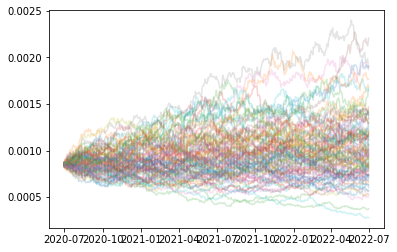

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
gbm_simulations_df.plot(alpha=0.2, legend=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f6ad06f3b50>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]


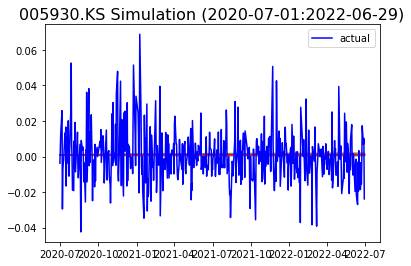

In [ ]:
#도식화

ax = gbm_simulations_df.plot(alpha=0.2, legend=False)

#가상 수익률 예측
line_1 = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')

#원래 로그 수익률 추이
line_2, = ax.plot(index, test, color = 'blue')

#제목
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean','actual'))


In [ ]:
test

Date
2022-05-02   -0.001485
2022-05-03    0.002967
2022-05-04    0.005908
2022-05-06   -0.020834
2022-05-10   -0.012103
2022-05-11    0.000000
2022-05-12   -0.012251
2022-05-13    0.024354
2022-05-16   -0.003012
2022-05-17    0.019418
2022-05-18    0.007369
2022-05-19   -0.008850
2022-05-20    0.007380
2022-05-23   -0.001472
2022-05-24   -0.020834
2022-05-25   -0.001505
2022-05-26   -0.007559
2022-05-27    0.009064
2022-05-30    0.017884
2022-05-31   -0.004441
2022-06-02   -0.010440
2022-06-03    0.001498
2022-06-07   -0.019653
2022-06-08   -0.003058
2022-06-09   -0.001533
2022-06-10   -0.021706
2022-06-13   -0.027007
2022-06-14   -0.003226
2022-06-15   -0.019576
2022-06-16    0.003289
2022-06-17   -0.018228
2022-06-20   -0.018566
2022-06-21   -0.003413
2022-06-22   -0.015504
2022-06-23   -0.003478
2022-06-24    0.017272
2022-06-27    0.006826
2022-06-28    0.010152
2022-06-29   -0.023851
Name: log_close, dtype: float64

In [ ]:
!pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.2 MB/s 


In [ ]:
from datetime import datetime
import backtrader as bt


Gradient Boosting Machine for Regression
GBM : 금융시장에서 주가의 통계적 속성을 잘 반영하는 대표적인 모형.

코스피 지수의 5년치 종가 데이터 사용
주가의 기대수익률(u)
주가의 변동성(6) -- 과거 데이터로 추정.


In [ ]:
# #시계열 : 3589
# # gradient boosting for regression in scikit-learn
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from matplotlib import pyplot
# # define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

#n_samples : 정수(옵션, 디폴트 100) = 표본 데이터의 갯수 N

#n_features : 정수(옵션, 디폴트 100) = 독립변수(feature)의 수(차원) M

#random_state : 난수 발생용 시드값

로그수익률 (2010 ~ 2022년)